In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn import decomposition
import pickle
from tensorflow.keras.datasets import mnist

In [ ]:
# load data và reshape nó về dạng đơn
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
x_train = x_train.reshape(-1,784).astype('float32')/255.0
x_test = x_test.reshape(-1,784).astype('float32')/255.0
print(x_test.shape)
print(x_train.shape)

(60000, 28, 28)
(10000, 784)
(60000, 784)


In [ ]:
# tạo 1 biến e nhỏ để tránh trường hợp nhân với 0
e = 1e-9

imag_mean = np.mean(x_train,axis = 0, keepdims=True)
imag_std = np.std(x_train,axis = 0, keepdims=True)
print(imag_mean.shape)
print(imag_std.shape)
x_train -= imag_mean;    x_train /= (imag_std + e)   
x_test -= imag_mean;    x_test /= (imag_std + e)
print(x_train.shape)

(1, 784)
(1, 784)
(60000, 784)


In [ ]:
m, n = x_train.shape
sicma = 1/m*np.dot(x_train.T,x_train)
U, S, VH = np.linalg.svd(sicma)
ei = np.diag(S)
k = 100
print('Retained information: ', np.sum(ei[1:k])/np.sum(ei))
Uk = U[:,1:k]
Z = np.dot(x_train,Uk)

Retained information:  0.6494713


In [ ]:
n_components = 128
pca = decomposition.PCA(n_components=n_components)
pca.fit(x_train)
Z = pca.transform(x_train)
print('Retained ratio: ', np.sum(pca.explained_variance_ratio_))

Retained ratio:  0.76326585


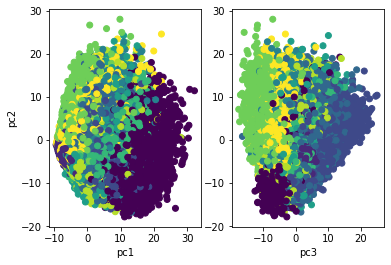

Text(0, 0.5, 'Cumulative variance')

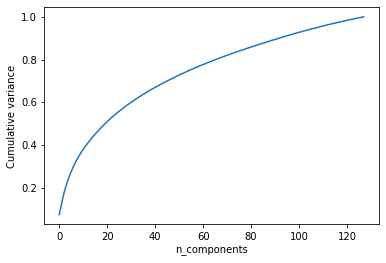

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.subplot(1,2,2)
plt.scatter(Z[:,2],Z[:,1],c=y_train)
plt.xlabel('pc3')        
plt.show()

plt.figure()
cum_var = np.cumsum(pca.explained_variance_ratio_/np.sum(pca.explained_variance_ratio_))
plt.plot(cum_var)
plt.xlabel('n_components')
plt.ylabel('Cumulative variance')

In [ ]:
from sklearn.linear_model import LogisticRegression

logren = LogisticRegression()
logren.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logren.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

0.924
